In [33]:
%matplotlib inline

In [28]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2

import plotly
import plotly.graph_objs as graphobjs

import nibabel as nib

In [2]:
def loadCsv(path):
    """Method for getting a numpy array from the csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [int(line[0]), int(line[1]), int(line[2]), int(line[3])]
            points.append(entry)
    points = np.array(points)
    return points

In [26]:
def array_to_plot(points, token, resolution, outfile_name=""):
    """Generates the plotly from the csv file."""
    # Type in the path to your csv file here
    
    thedata = points
#     print(thedata)

    # Set tupleResolution to resolution input parameter
    tupleResolution = resolution;

    # EG: for Aut1367, the spacing is (0.01872, 0.01872, 0.005).
    xResolution = tupleResolution[0]
    yResolution = tupleResolution[1]
    zResolution = tupleResolution[2]
    # Now, to get the mm image size, we can multiply all x, y, z
    # to get the proper mm size when plotting.
    
#     print('asdf')
#     x = [x * xResolution for x in thedata[:, 0]]
#     print(x)

    trace1 = graphobjs.Scatter3d(
        x = [x * xResolution for x in thedata[:, 0]],
        y = [x * yResolution for x in thedata[:, 1]],
        z = [x * zResolution for x in thedata[:, 2]],
        mode='markers',
        marker=dict(
            size=1.2,
            color='cyan',                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.15
        )
    )

    data = [trace1]
    layout = graphobjs.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)'
    )

    fig = graphobjs.Figure(data=data, layout=layout)
#     print(self._token + "plotly")

    make_sure_path_exists('plots')
    
    if outfile_name == "":
        plotly.offline.plot(fig, filename= 'plots/' + token + "_plot.html")
    else:
        plotly.offline.plot(fig, filename= 'plots/' + outfile_name + "_plot.html")

In [15]:
import os
import errno

def make_sure_path_exists(path):
    """Check if the directory a file is going to be written to exists, and if not, create the directory."""
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

In [4]:
inToken = 'Fear199'

csv_file_path = 'points/' + inToken + '.csv'

points = loadCsv(csv_file_path)

In [5]:
print(points.shape)
print(points)

(7467, 4)
[[  0   6 309 252]
 [  0  16 460 219]
 [  0 110 184 234]
 ..., 
 [382 118 368 249]
 [382 179 414 240]
 [382 216 505 249]]


In [6]:
seeds = points[points[:, 3] > 250]

In [7]:
print(seeds)

[[  0   6 309 252]
 [  0 142  10 252]
 [  1  39 277 252]
 ..., 
 [382  77 378 255]
 [382  96 159 252]
 [382 118 135 252]]


In [9]:
inImg = imgDownload(inToken, resolution=5) 

In [10]:
resolution = inImg.GetSpacing();
print(resolution)

(0.01872, 0.01872, 0.005)


In [25]:
array_to_plot(seeds, "Fear199", resolution, outfile_name="Fear199_seeds")

[[  0   6 309 252]
 [  0 142  10 252]
 [  1  39 277 252]
 ..., 
 [382  77 378 255]
 [382  96 159 252]
 [382 118 135 252]]


In [23]:
array_to_plot(points, "Fear199", resolution, outfile_name="Fear199_og2")

[[  0   6 309 252]
 [  0  16 460 219]
 [  0 110 184 234]
 ..., 
 [382 118 368 249]
 [382 179 414 240]
 [382 216 505 249]]
asdf
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.018720000000000001, 0.018720000000000001, 0.018720000000000001, 0.018720000000000001, 0.018720000000000001, 0.018720000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.037440000000000001, 0.056160000000000002, 0.056160000000000002, 0.056160000000000002, 0.056160000000000002, 0.056160000000000002, 0.056160000000000002, 0.056160000000000002, 0.074880000000000002, 0.074880000000000002, 0.074880000000000002, 0.074880000000000002, 0.074880000000000002, 0.0748

# no histeq

In [76]:
# plotting no histeq
# full image
temp_file_path = "img/" + "Fear199" + ".nii"

# Downsampled image
# temp_file_path = "img/" + inToken + "_ds.nii"

# Histogram Equilized image
# temp_file_path = "histeq/" + inToken + "_histeq.nii"

num_points = 7500

temp_img = nib.load(temp_file_path)

## Sanity check for shape
temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = temp_img.get_data()
temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))


# plane = 0;


# ##Iterate through all planes to get slices
# for plane in range(data.shape[0]):
#     ## Convert memmap array into ndarray for toimage process
#     output = np.asarray(data[plane])
#     ## Save as TIFF for Ilastik
#     outfile_path = dir_name + '/' + token + "_" + str(plane) + '.tiff'
# #     make_sure_path_exists(dir_name)
# #     scipy.misc.toimage(output).save(outfile_path)


shape:
(405, 272, 537)
<class 'numpy.core.memmap.memmap'>
max:
3969
v.shape:
(1135897,)
x.size before filter: 1135897
y.size before filter: 1135897
z.size before filter: 1135897
v.size before filter: 1135897
x.size after filter: 7615
y.size after filter: 7615
z.size after filter: 7615
v.size after filter: 7615
Num Points: 7615


In [77]:
print(temp_points.shape)
print(temp_points)
print(np.max(temp_points[:,3]))

(7615, 4)
[[  0 139  39   9]
 [ 17 193 211   7]
 [ 19 154 187   6]
 ..., 
 [346 136 331   6]
 [362 107 149   9]
 [365 106 176  12]]
53


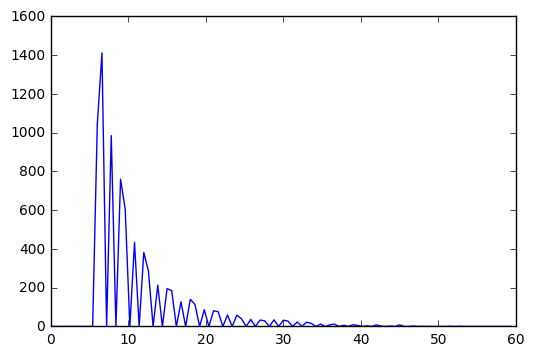

In [78]:
(values, bins) = np.histogram(temp_points[:,3], bins=100, range=(0,60))
plt.plot(bins[:-1], values)

In [79]:
seeds_t = temp_points[temp_points[:, 3] > 20]

In [80]:
print(seeds_t.shape)
print(seeds_t)

(647, 4)
[[ 27 119 291  27]
 [ 33 113 320  29]
 [ 37 139 324  34]
 ..., 
 [328 119 335  21]
 [328 120 338  34]
 [329 110 334  24]]


In [81]:
array_to_plot(seeds_t, "Fear199", resolution, outfile_name="Fear199_seeds_t")

In [82]:
seeds_l = temp_points[temp_points[:, 3] < 10]

In [83]:
print(seeds_l.shape)
print(seeds_l)

(4202, 4)
[[  0 139  39   9]
 [ 17 193 211   7]
 [ 19 154 187   6]
 ..., 
 [346 115 317   7]
 [346 136 331   6]
 [362 107 149   9]]


In [84]:
array_to_plot(seeds_l, "Fear199", resolution, outfile_name="Fear199_seeds_l")

In [85]:
# plotting raw
array_to_plot(temp_points, "Fear199", resolution, outfile_name="Fear199_raw")

In [86]:
print(resolution)

(0.01872, 0.01872, 0.005)


# with histeq

In [96]:
# plotting no histeq
# full image
# temp_file_path = "img/" + "Fear199" + ".nii"

# Downsampled image
# temp_file_path = "img/" + inToken + "_ds.nii"

# Histogram Equilized image
temp_file_path = "histeq/" + inToken + "_histeq.nii"

num_points = 7500

temp_img = nib.load(temp_file_path)

## Sanity check for shape
temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = temp_img.get_data()
temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))


# plane = 0;


# ##Iterate through all planes to get slices
# for plane in range(data.shape[0]):
#     ## Convert memmap array into ndarray for toimage process
#     output = np.asarray(data[plane])
#     ## Save as TIFF for Ilastik
#     outfile_path = dir_name + '/' + token + "_" + str(plane) + '.tiff'
# #     make_sure_path_exists(dir_name)
# #     scipy.misc.toimage(output).save(outfile_path)


shape:
(405, 272, 537)
<class 'numpy.core.memmap.memmap'>
max:
255
v.shape:
(39164705,)
x.size before filter: 39164705
y.size before filter: 39164705
z.size before filter: 39164705
v.size before filter: 39164705
x.size after filter: 7368
y.size after filter: 7368
z.size after filter: 7368
v.size after filter: 7368
Num Points: 7368


In [97]:
print(temp_points.shape)
print(temp_points)
print(np.max(temp_points[:,3]))

(7368, 4)
[[  0 156 279 255]
 [  0 182 272 252]
 [  0 211 251 255]
 ..., 
 [382 185 511 255]
 [382 201 338 255]
 [382 235 410 255]]
255


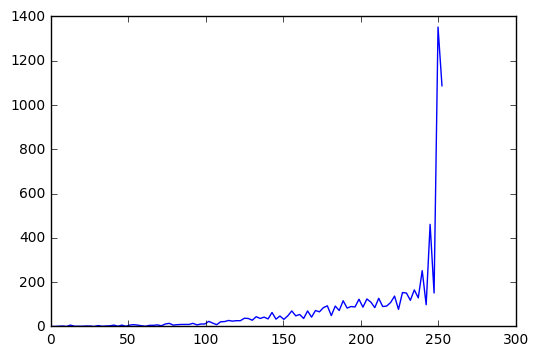

In [98]:
(values, bins) = np.histogram(temp_points[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [99]:
seeds_hh = temp_points[temp_points[:, 3] > 250]

In [100]:
print(seeds_hh.shape)
print(seeds_hh)

(2001, 4)
[[  0 156 279 255]
 [  0 182 272 252]
 [  0 211 251 255]
 ..., 
 [382 185 511 255]
 [382 201 338 255]
 [382 235 410 255]]


In [101]:
array_to_plot(seeds_hh, "Fear199", resolution, outfile_name="Fear199_seeds_hh")

In [102]:
seeds_hl = temp_points[temp_points[:, 3] < 240]

In [103]:
print(seeds_hl.shape)
print(seeds_hl)

(3967, 4)
[[  6 141 397 238]
 [  7 174 283 234]
 [  9 229  32 233]
 ..., 
 [379 230 442 235]
 [380  90  25 228]
 [380 130 456 233]]


In [104]:
array_to_plot(seeds_hh, "Fear199", resolution, outfile_name="Fear199_seeds_hl")